<a href="https://colab.research.google.com/github/LindsClar/Capstone_2/blob/main/Copy_of_Capstone_Two_Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Organize your data to streamline the next steps of your capstone
#GOAL compare TX market to CA
#load imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
#DATA COLLECTION: load data ie. read_csv()
df = pd.read_csv('USRealEstateTrends.csv')
# see a sample of the data
df.head()

,RegionID,SizeRank,RegionName,StateName,2018-02-HomeValue,2018-02-DaysPending,2018-02-CutRaw,2018-03-HomeValue,2018-03-DaysPending,2018-03-CutRaw,...,2024-02-CutRaw,2024-03-HomeValue,2024-03-DaysPending,2024-03-CutRaw,2024-04-HomeValue,2024-04-DaysPending,2024-04-CutRaw,2024-05-HomeValue,2024-05-DaysPending,2024-05-CutRaw
0,102001,0,United States,NaN,225746.614318,52.0,7600.0,227155.648994,48.0,8900.0,...,10000.0,357374.362080,42.0,10000.0,359240.114070,38.0,10000.0,360681.294250,37.0,10000.0
1,394913,1,"New York, NY",NY,468313.430126,68.0,16000.0,470102.249154,63.0,19751.5,...,25000.0,646508.747102,55.0,25000.0,652619.099940,51.0,26000.0,657279.223513,47.0,30000.0
2,753899,2,"Los Angeles, CA",CA,629019.165765,33.0,20000.0,636850.139417,31.0,20000.0,...,30000.5,952665.578913,32.0,34000.0,956266.687926,29.0,40012.0,962388.491425,28.0,40000.0
3,394463,3,"Chicago, IL",IL,229741.266973,52.0,8000.0,231317.183706,42.0,9100.0,...,10000.0,316875.294320,29.0,10000.0,319764.144323,25.0,10000.0,321897.252361,23.0,10000.0
4,394514,4,"Dallas, TX",TX,241533.231800,46.0,8562.0,243401.180622,42.0,9900.0,...,10000.0,379972.349667,42.0,10000.0,380957.392395,38.0,10000.0,381103.625851,38.0,10000.0


In [3]:
#DATA DEFINITION
#renaming the columns in df
#Should I rename all the columns? Should I eliminate more columns or how can I combine thme by year?
df.rename(index=str, columns={'RegionName' : 'Location', 'StateName':'State'}, inplace=True)
df.head()


,RegionID,SizeRank,Location,State,2018-02-HomeValue,2018-02-DaysPending,2018-02-CutRaw,2018-03-HomeValue,2018-03-DaysPending,2018-03-CutRaw,...,2024-02-CutRaw,2024-03-HomeValue,2024-03-DaysPending,2024-03-CutRaw,2024-04-HomeValue,2024-04-DaysPending,2024-04-CutRaw,2024-05-HomeValue,2024-05-DaysPending,2024-05-CutRaw
0,102001,0,United States,NaN,225746.614318,52.0,7600.0,227155.648994,48.0,8900.0,...,10000.0,357374.362080,42.0,10000.0,359240.114070,38.0,10000.0,360681.294250,37.0,10000.0
1,394913,1,"New York, NY",NY,468313.430126,68.0,16000.0,470102.249154,63.0,19751.5,...,25000.0,646508.747102,55.0,25000.0,652619.099940,51.0,26000.0,657279.223513,47.0,30000.0
2,753899,2,"Los Angeles, CA",CA,629019.165765,33.0,20000.0,636850.139417,31.0,20000.0,...,30000.5,952665.578913,32.0,34000.0,956266.687926,29.0,40012.0,962388.491425,28.0,40000.0
3,394463,3,"Chicago, IL",IL,229741.266973,52.0,8000.0,231317.183706,42.0,9100.0,...,10000.0,316875.294320,29.0,10000.0,319764.144323,25.0,10000.0,321897.252361,23.0,10000.0
4,394514,4,"Dallas, TX",TX,241533.231800,46.0,8562.0,243401.180622,42.0,9900.0,...,10000.0,379972.349667,42.0,10000.0,380957.392395,38.0,10000.0,381103.625851,38.0,10000.0


In [4]:
#dropping NaN
df.dropna(inplace=True)
df.head()

#Calculate summary statistics for each of your columns
print(df.describe())

#Looking through all the data there's are specific columns that are neccesary
#Examples of unneccary data is things like average region ID or size rank. I'm focusing on things that affect pricing
#and state

df = df.drop(['RegionID', 'SizeRank'], axis=1)
print(df.head())


            RegionID    SizeRank  2018-02-HomeValue  2018-02-DaysPending  \
count     122.000000  122.000000         122.000000           122.000000   
mean   403624.549180  164.696721      237485.113953            56.442623   
std     55845.682333  132.774580      131427.416320            16.720873   
min    394308.000000    1.000000       83849.228691            21.000000   
25%    394505.000000   64.250000      156408.653741            44.250000   
50%    394845.500000  133.500000      204431.363812            55.500000   
75%    395054.500000  222.500000      261289.135388            68.000000   
max    753920.000000  569.000000      915915.834585            94.000000   

       2018-02-CutRaw  2018-03-HomeValue  2018-03-DaysPending  2018-03-CutRaw  \
count      122.000000         122.000000           122.000000      122.000000   
mean      8248.467213      238974.293875            53.377049     8636.307377   
std       5534.118179      132589.888459            19.525922     5450.2

In [5]:
#combining some columns for home value of 2018
home_value_2018_columns = ['2018-02-HomeValue', '2018-03-HomeValue', '2018-04-HomeValue', '2018-05-HomeValue', '2018-06-HomeValue']
# VETO: home_value_2018_columns = [col for col in df.columns if '2018' in col and 'HomeValue' in col]
df['2018_Avg_HomeValue'] = df[home_value_2018_columns].mean(axis=1)
print(df['2018_Avg_HomeValue'].head())

#dropping the columns for 2018
#df.drop(columns=home_value_2018_columns, inplace=True)

#combining some columns for home value of 2024
home_value_2024_columns = [col for col in df.columns if '2024' in col and 'HomeValue' in col]
df['2024_Avg_HomeValue'] = df[home_value_2024_columns].mean(axis=1)
print(df['2024_Avg_HomeValue'].head())

#dropping the columns for 2024
#df.drop(columns=home_value_2024_columns, inplace=True)

1    472336.486569
2    641491.328219
3    232147.946582
4    244866.333211
5    210290.129522
Name: 2018_Avg_HomeValue, dtype: float64
1    646913.833997
2    956406.925460
3    317207.470214
4    379826.568828
5    309183.633050
Name: 2024_Avg_HomeValue, dtype: float64


In [6]:
#DATA ORGANIZATION - Adding this to github

             Location State  2018-02-HomeValue  2018-02-DaysPending  \
2     Los Angeles, CA    CA      629019.165765                 33.0   
12  San Francisco, CA    CA      915915.834585                 21.0   
17      San Diego, CA    CA      586462.807159                 33.0   
62    Bakersfield, CA    CA      212531.666950                 51.0   
70         Oxnard, CA    CA      603755.944417                 34.0   

    2018-02-CutRaw  2018-03-HomeValue  2018-03-DaysPending  2018-03-CutRaw  \
2          20000.0      636850.139417                 31.0         20000.0   
12         39000.0      925972.955108                 19.0         45112.0   
17         15000.0      588610.353201                 33.0         15000.0   
62          7000.0      213905.260766                 48.0          7100.0   
70         11000.0      606107.615916                 32.0         14995.0   

    2018-04-HomeValue  2018-04-DaysPending  ...  2024-03-DaysPending  \
2       642812.891135           

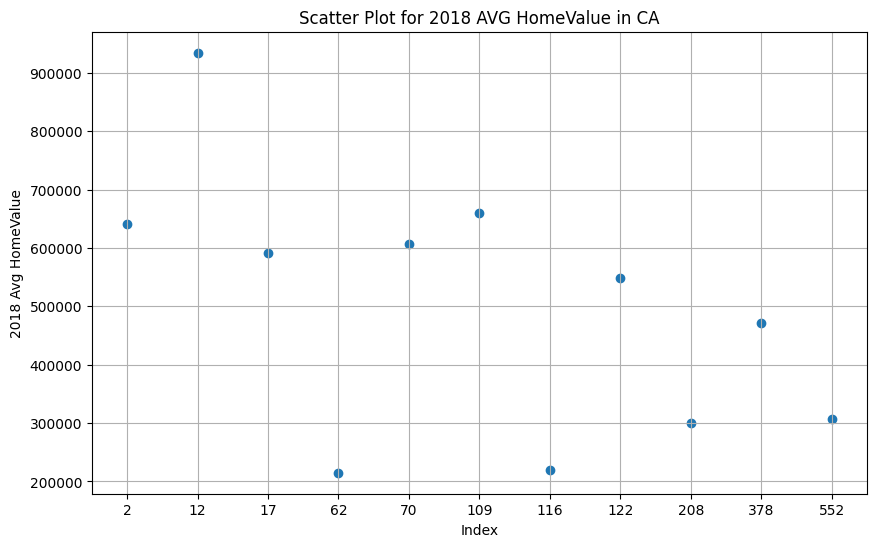


Statistics for Home Value in 2024:
count        11.000000
mean     499701.021913
std      222285.194701
min      214921.621461
25%      303773.412223
50%      548919.274205
75%      624459.908812
max      934444.021471
Name: 2018_Avg_HomeValue, dtype: float64


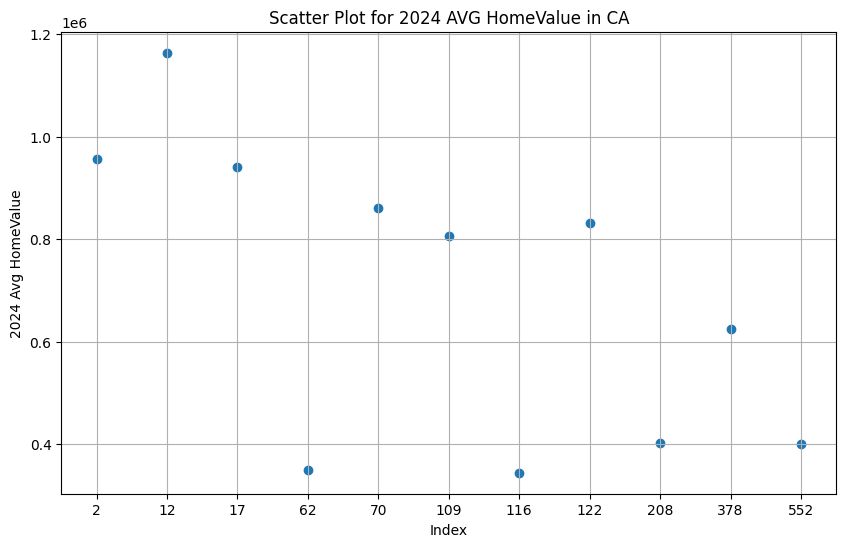


Statistics for Home Value in 2024:
count    1.100000e+01
mean     6.983087e+05
std      2.878954e+05
min      3.438981e+05
25%      4.004028e+05
50%      8.068311e+05
75%      9.011447e+05
max      1.164165e+06
Name: 2024_Avg_HomeValue, dtype: float64
               Location State  2018-02-HomeValue  2018-02-DaysPending  \
4            Dallas, TX    TX      241533.231800                 46.0   
5           Houston, TX    TX      208651.872272                 51.0   
66          McAllen, TX    TX      105348.864431                 87.0   
126  Corpus Christi, TX    TX      166118.001594                 77.0   
127     Brownsville, TX    TX      119749.603873                 83.0   

     2018-02-CutRaw  2018-03-HomeValue  2018-03-DaysPending  2018-03-CutRaw  \
4            8562.0      243401.180622                 42.0          9900.0   
5           10000.0      209394.157749                 45.0         10000.0   
66           5000.0      106010.935188                 91.0          50

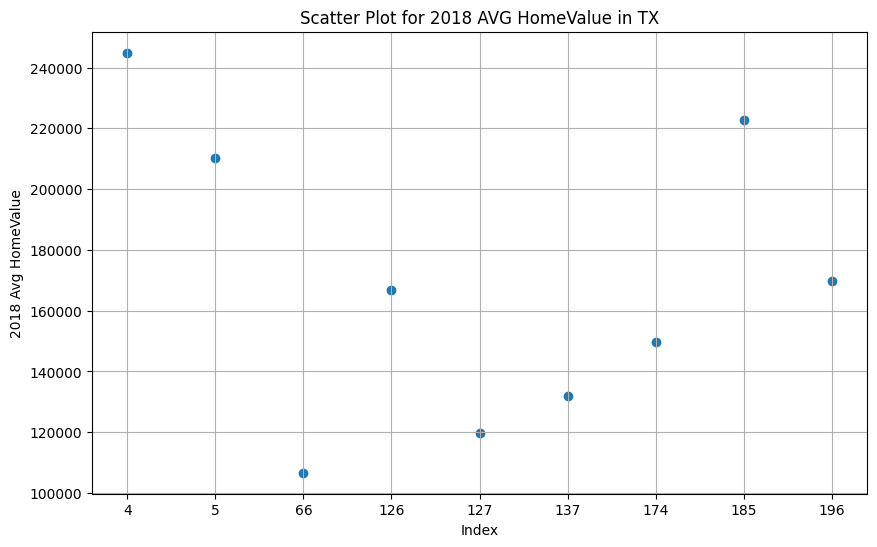


Statistics for Home Value in 2018:
count         9.000000
mean     169178.106588
std       47956.692706
min      106658.232979
25%      131888.344461
50%      166906.182599
75%      210290.129522
max      244866.333211
Name: 2018_Avg_HomeValue, dtype: float64


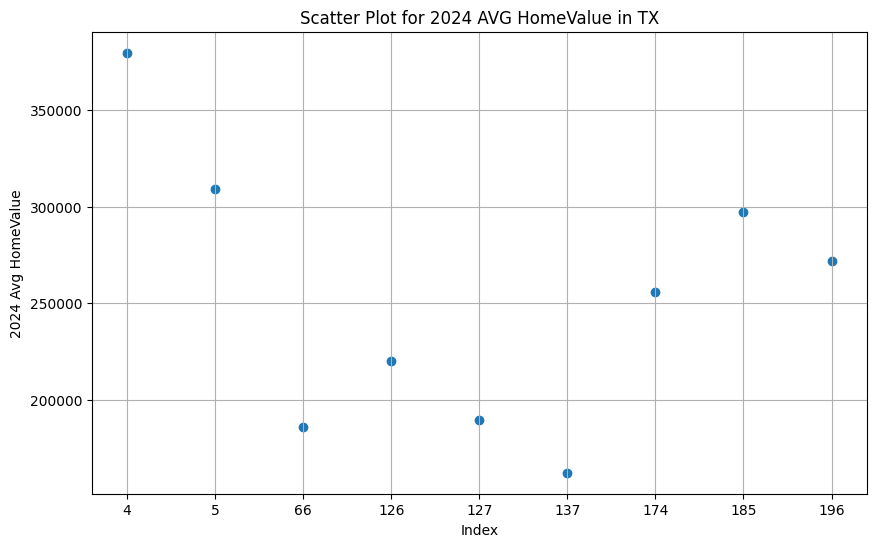


Statistics for Home Value in 2024:
count         9.000000
mean     252396.594878
std       70183.947980
min      162213.011474
25%      189515.249145
50%      256041.410582
75%      297097.546502
max      379826.568828
Name: 2024_Avg_HomeValue, dtype: float64


In [19]:
#DATA CLEANING
#extract all information for CA
CA_df = df.loc[df['State'] == 'CA']
print(CA_df.head())


#Graph CA average home value cost for 2018
plt.figure(figsize=(10, 6))
plt.scatter(CA_df.index, CA_df['2018_Avg_HomeValue'], marker='o')
plt.title('Scatter Plot for 2018 AVG HomeValue in CA')
plt.xlabel('Index')
plt.ylabel('2018 Avg HomeValue')
plt.grid(True)
plt.show()

#describe the 2018 average home cost
print('\nStatistics for Home Value in 2024:')
print(CA_df['2018_Avg_HomeValue'].describe())


#Graph CA average home value cost for 2024
plt.figure(figsize=(10, 6))
plt.scatter(CA_df.index, CA_df['2024_Avg_HomeValue'], marker='o')
plt.title('Scatter Plot for 2024 AVG HomeValue in CA')
plt.xlabel('Index')
plt.ylabel('2024 Avg HomeValue')
plt.grid(True)
plt.show()

print('\nStatistics for Home Value in 2024:')
print(CA_df['2024_Avg_HomeValue'].describe())


#Extracting NaN from CA
#CA_df.dropna(inplace=True)


#extract all information from TX
TX_df = df.loc[df['State']== 'TX']
print(TX_df.head())

#Graph TX average home value cost for 2018
plt.figure(figsize=(10, 6))
plt.scatter(TX_df.index, TX_df['2018_Avg_HomeValue'], marker='o')
plt.title('Scatter Plot for 2018 AVG HomeValue in TX')
plt.xlabel('Index')
plt.ylabel('2018 Avg HomeValue')
plt.grid(True)
plt.show()

print('\nStatistics for Home Value in 2018:')
print(TX_df['2018_Avg_HomeValue'].describe())


#Graph TX average home value cost for 2018
plt.figure(figsize=(10, 6))
plt.scatter(TX_df.index, TX_df['2024_Avg_HomeValue'], marker='o')
plt.title('Scatter Plot for 2024 AVG HomeValue in TX')
plt.xlabel('Index')
plt.ylabel('2024 Avg HomeValue')
plt.grid(True)
plt.show()

print('\nStatistics for Home Value in 2024:')
print(TX_df['2024_Avg_HomeValue'].describe())


#Extracting NaN from TX
#TX_df.dropna(inplace=True)

In [ ]:
#We see a steady increase for both properties. It does seem like there is more purchasing power in California both in 2018 and 2024.
#This is becasue there's more people in california and there seems to be more money moving through california.

#While in TX shows that there propbably half that sold througout TX if we look at the Index in the graph. I also notice that the Mean goes from
#169K to 252K which is a steady increase over the years but also shows why a lot of people have been moving to TX becasue the Mean cost in CA goes from
#499K to 698k. This data would indicate that purchasing a home is easier in Texas due to the cost of living but homes in CA are worth more due to location/Cost
#living.